In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Flight_Booking.csv')
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [4]:
#Dropping Column `Unnamed`

df= df.drop(columns=['Unnamed: 0'])
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
# `Checking missing Values`

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# **Frequency flights of each airline with their class**                                         

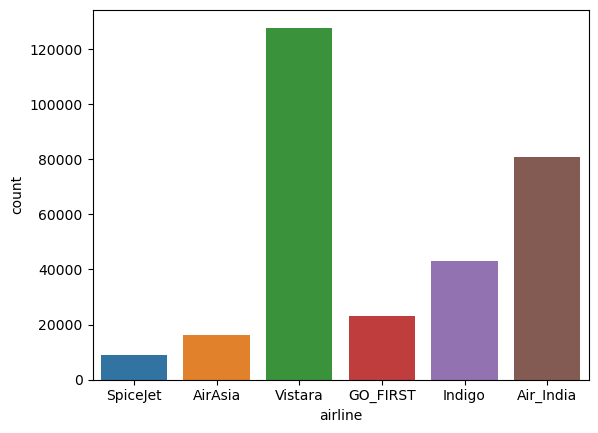

Highest Number of flights by Vistara followed by Air India


In [9]:
sns.countplot(x=df['airline'],data=df)
plt.show()
print("Highest Number of flights by Vistara followed by Air India")

In [10]:
df.groupby('airline')['class'].value_counts()

airline    class   
AirAsia    Economy     16098
Air_India  Economy     47994
           Business    32898
GO_FIRST   Economy     23173
Indigo     Economy     43120
SpiceJet   Economy      9011
Vistara    Economy     67270
           Business    60589
Name: count, dtype: int64

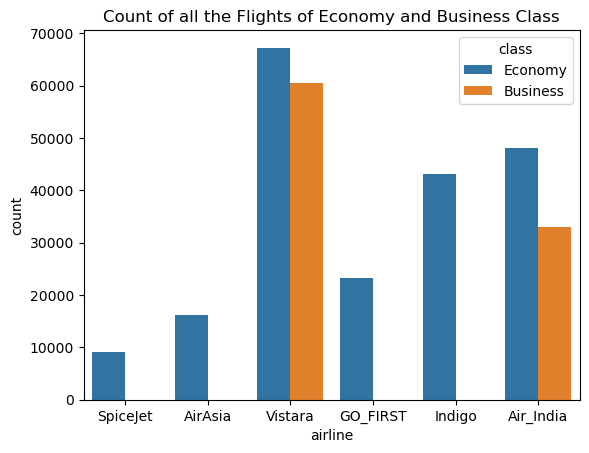

In [11]:
sns.countplot(x = df['airline'] ,hue = df['class'])
plt.title("Count of all the Flights of Economy and Business Class")
plt.show()

# **Price per Airline**

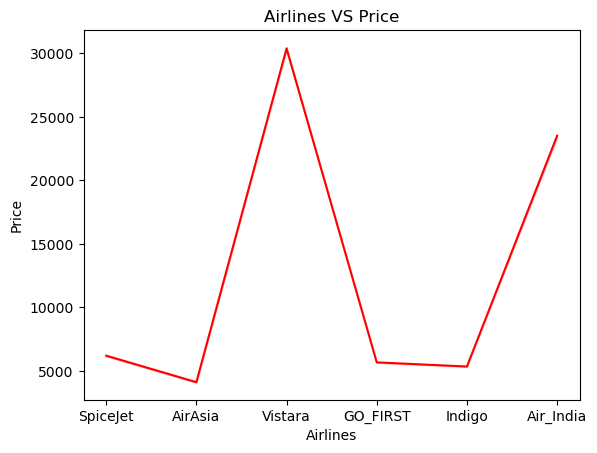

There is a variation in price with different airlines


In [13]:
sns.lineplot(x = df['airline'], y= df['price'],color='red')
plt.title( 'Airlines VS Price')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()
print("There is a variation in price with different airlines")

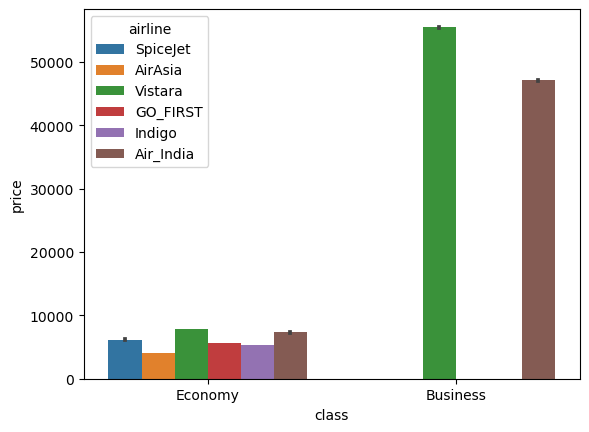

Range of Price of all the Flights of Economy and Business Class


In [14]:
sns.barplot(x='class',y='price',data= df, hue='airline')
plt.show()
print("Range of Price of all the Flights of Economy and Business Class")

# **Days left vs Price**

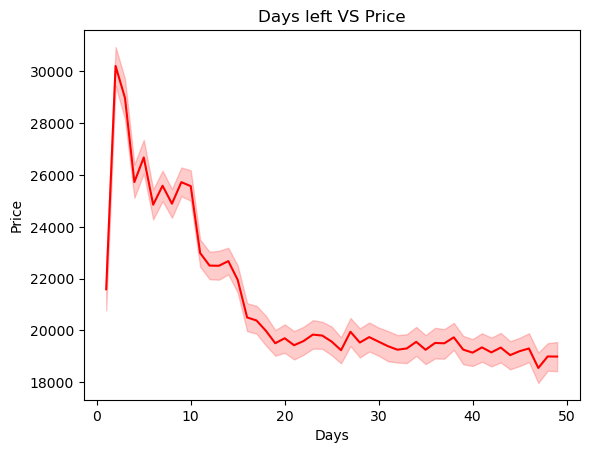

The price of the ticket increases as the day left for departure decreases


In [16]:
sns.lineplot(x = df['days_left'], y= df['price'],color='red')
plt.title( 'Days left VS Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
print("The price of the ticket increases as the day left for departure decreases")

Range of price of flights with source and destination city according to days left


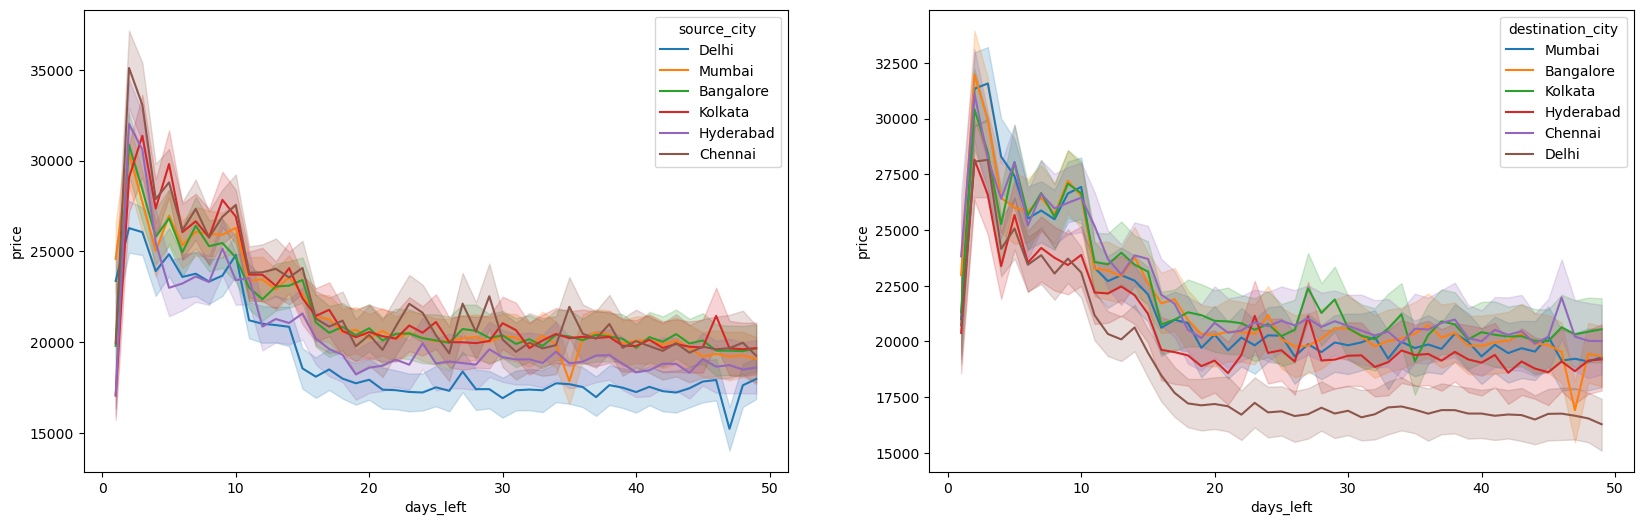

In [17]:
fig , ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data= df, hue= 'source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data= df, hue= 'destination_city',ax=ax[1])
print("Range of price of flights with source and destination city according to days left")
plt.show()


In [18]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [19]:
dx =  df[['source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 
      'class'
]]

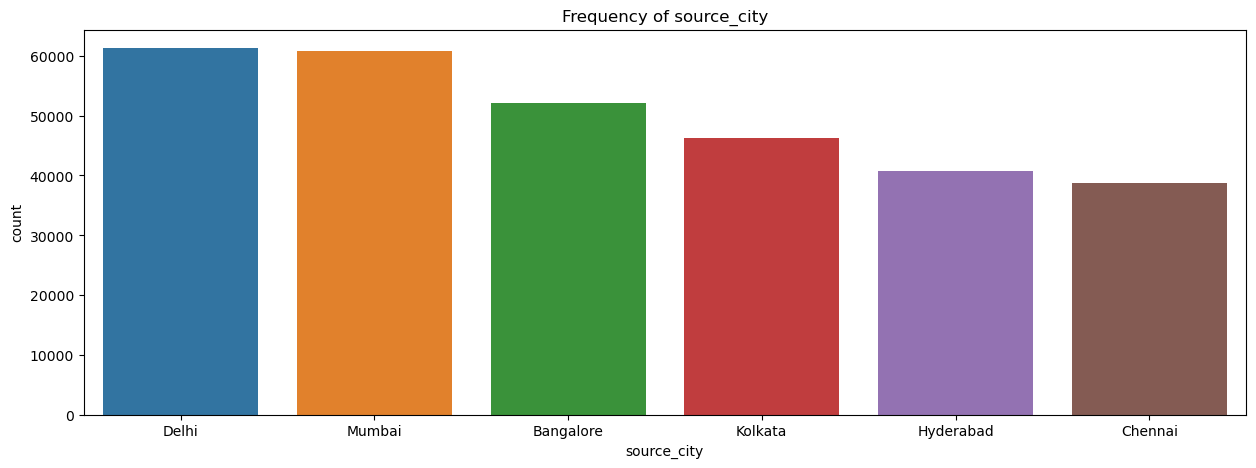

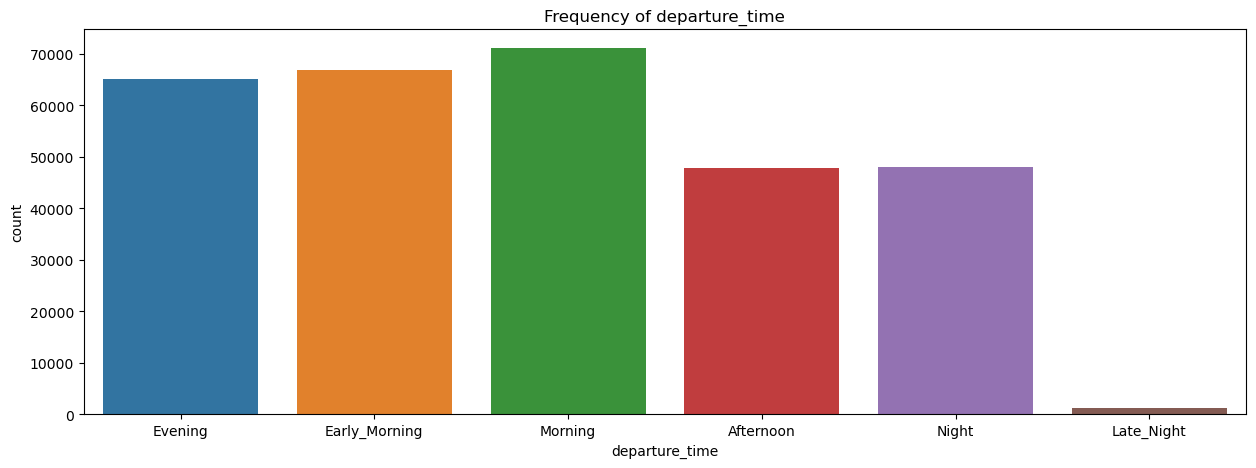

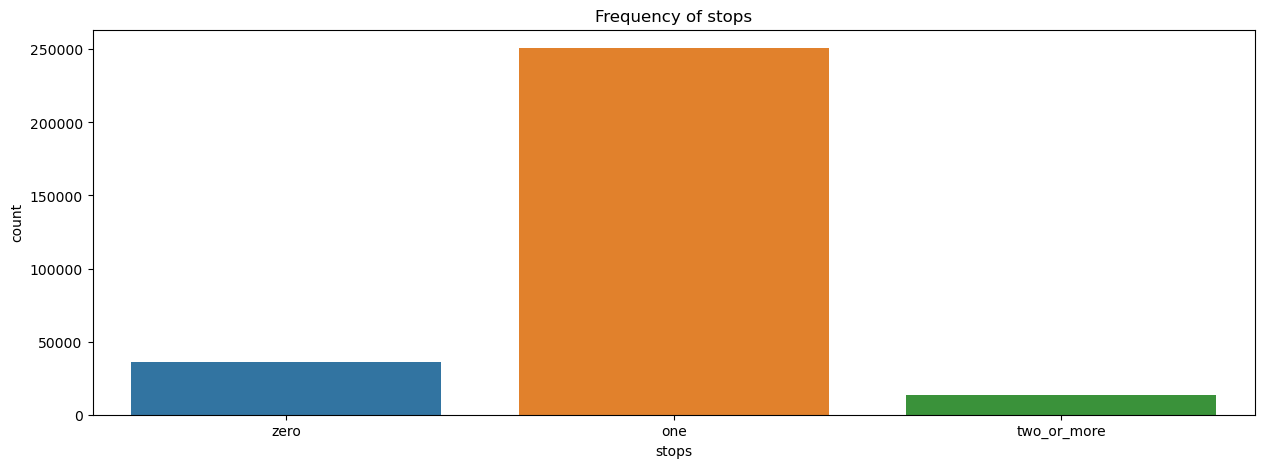

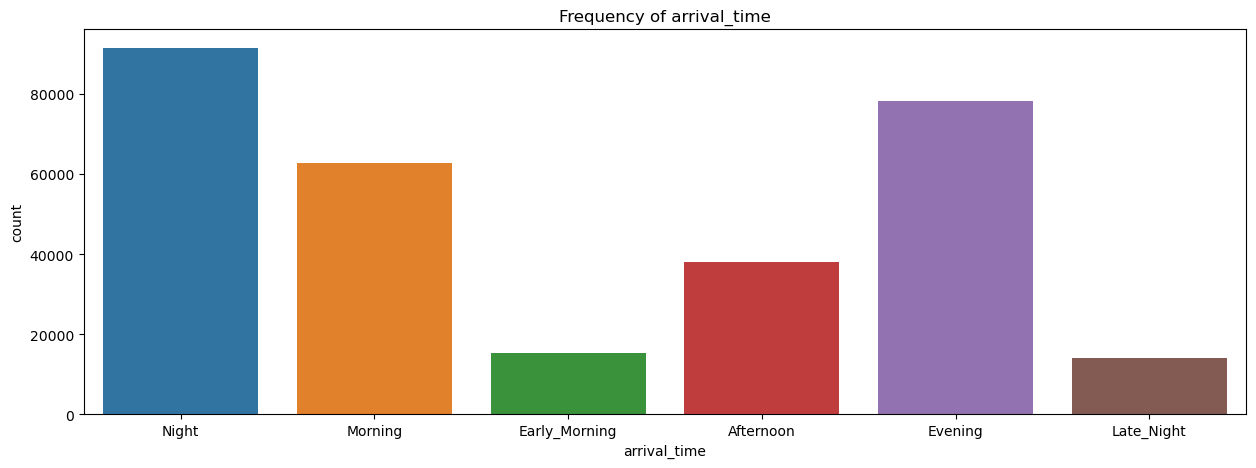

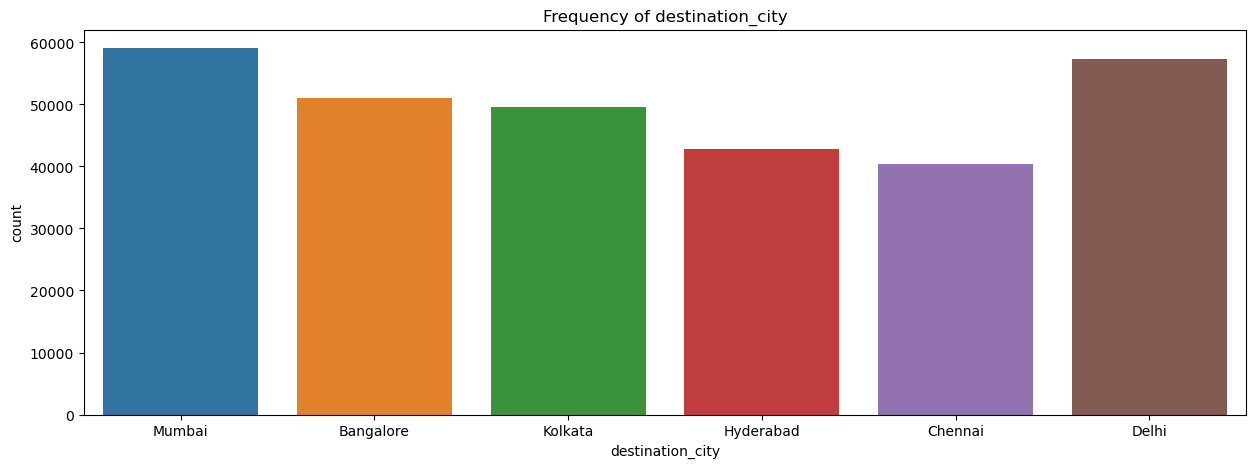

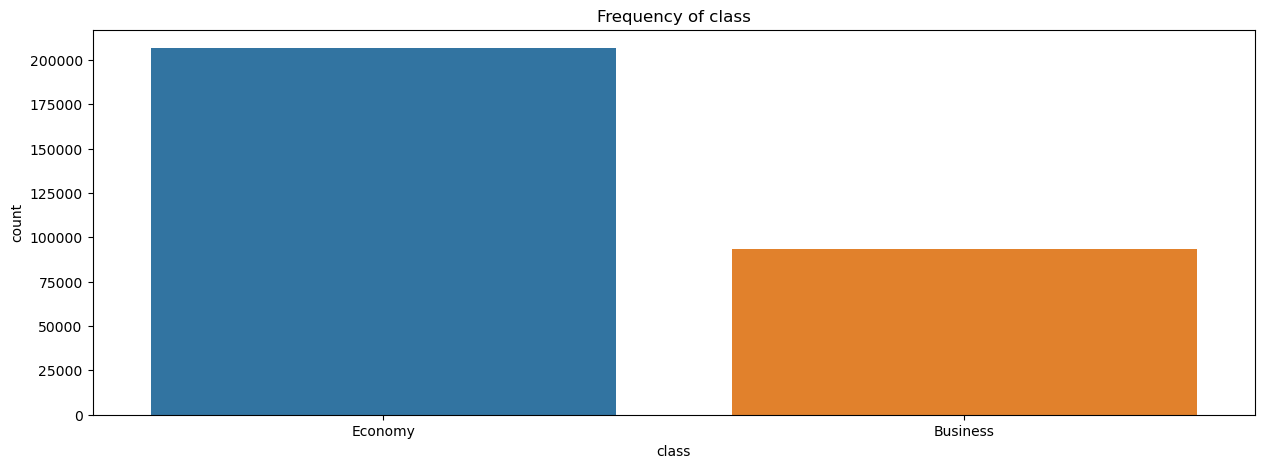

In [20]:
for i in dx:
    plt.figure(figsize = (15,5))
    sns.countplot(x=i,data=df)
    plt.title(f'Frequency of {i}')
    plt.show()

# **Label Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

In [23]:
le_encodea = df[['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 
]]

In [24]:
for i in le_encodea:
    df[i] = le.fit_transform(df[i])

In [25]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


# **Feature Selection**

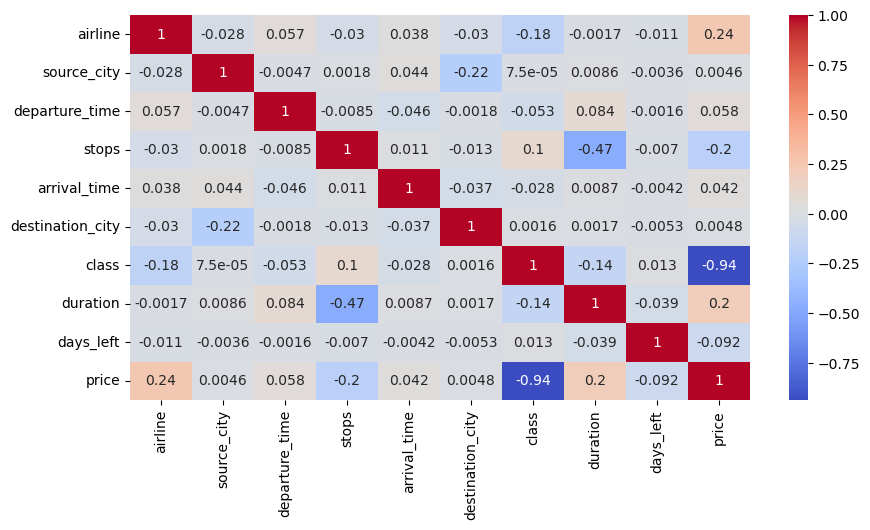

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot = True ,cmap = 'coolwarm')
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list =[]
for col in df.columns:
    if (( df[col].dtype != 'object' )and (col !='price') ):
        col_list.append(col)

print(col_list)

['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


In [29]:
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                   for i in range(len(X.columns))]
print(vif_data)

           features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


**VIF value should be less than 5**

In [31]:
X = df.drop(columns = ['price', 'flight'])
y = df['price']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20 ,random_state = 1)

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

# **Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()

lr.fit(x_train , y_train)

LinearRegression()

In [36]:
ylr_pred = lr.predict(x_test)

diff_lr = pd.DataFrame(np.c_[y_test,ylr_pred],columns = ['Actual_value','Predicated_value'])
diff_lr

,Actual_value,Predicated_value
0,61404.0,53598.761687
1,5402.0,7878.899283
2,60365.0,56179.249182
3,5882.0,6872.934865
4,2203.0,2659.072137
...,...,...
60026,3980.0,5341.060854
60027,7220.0,7133.991381
60028,13184.0,10289.315329
60029,4942.0,6211.525321


In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


lr_r2 = r2_score(y_test,ylr_pred)
print(f"R2_Score : {lr_r2}")

lr_mean_abserror = mean_absolute_error(y_test,ylr_pred)
print(f"Mean Abs. Error : {lr_mean_abserror}")

lr_mean_sqrerror = mean_squared_error(y_test,ylr_pred)
print(f"Mean Square Error : {lr_mean_sqrerror}")

lr_rmse  = np.sqrt(lr_mean_sqrerror)
print(f"RSME : {lr_rmse}")

le_MAPE = mean_absolute_percentage_error(y_test,ylr_pred)*100
print(f"MAPE : {le_MAPE}")


R2_Score : 0.9047575323299267
Mean Abs. Error : 4640.709815745075
Mean Square Error : 49141773.560733154
RSME : 7010.1193685081535
MAPE : 43.71752424392495


C:\Users\Onkar\AppData\Local\Temp\ipykernel_11252\1203591246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
C:\Users\Onkar\AppData\Local\Temp\ipykernel_11252\1203591246.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ylr_pred, label='Predicted')


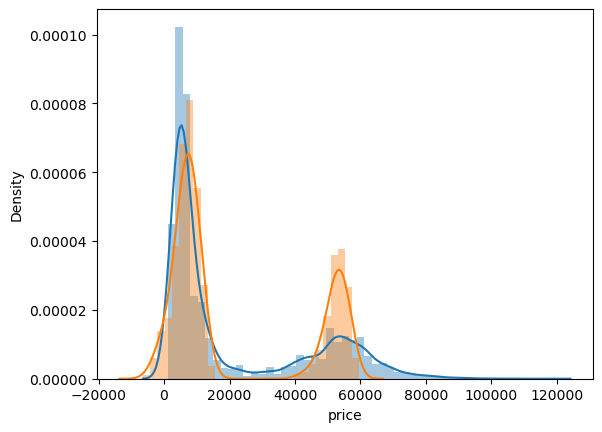

In [38]:
sns.distplot(y_test,label='Actual')
sns.distplot(ylr_pred, label='Predicted')
plt.show()

# **Decision Tree Regressor**

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
ydt_pred = dt.predict(x_test)
diff_dt = pd.DataFrame(np.c_[y_test,ydt_pred],columns = ['Actual_value','Predicated_value'])
diff_dt.head()

,Actual_value,Predicated_value
0,61404.0,61404.0
1,5402.0,6395.0
2,60365.0,58125.0
3,5882.0,4801.0
4,2203.0,2203.0


In [41]:

dt_r2 = r2_score(y_test,ydt_pred)
print(f"R2_Score : {dt_r2}")

dt_mean_abserror = mean_absolute_error(y_test,ydt_pred)
print(f"Mean Abs. Error : {dt_mean_abserror}")

dt_mean_sqrerror = mean_squared_error(y_test,ydt_pred)
print(f"Mean Square Error : {dt_mean_sqrerror}")

dt_rmse  = np.sqrt(dt_mean_sqrerror)
print(f"RSME : {dt_rmse}")

dt_MAPE = mean_absolute_percentage_error(y_test,ydt_pred)*100
print(f"MAPE : {dt_MAPE}")


R2_Score : 0.9760869820163723
Mean Abs. Error : 1176.6762117350481
Mean Square Error : 12338278.749516452
RSME : 3512.5886109131043
MAPE : 7.544595713410718


In [94]:

Accuracy_DT = 100-dt_MAPE                                      
print(f"Accuracy with Decision Tree Regressor: {Accuracy_DT:.2f}%")


Accuracy with Decision Tree Regressor: 92.46%


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
yrf_pred = rf.predict(x_test)
diff_rf = pd.DataFrame(np.c_[y_test,yrf_pred],columns = ['Actual_value','Predicated_value'])
diff_rf.head()

,Actual_value,Predicated_value
0,61404.0,61404.000000
1,5402.0,6270.540000
2,60365.0,63910.920000
3,5882.0,4849.422167
4,2203.0,2203.000000


In [44]:

rf_r2 = r2_score(y_test,yrf_pred)
print(f"R2_Score : {rf_r2}")

rf_mean_abserror = mean_absolute_error(y_test,yrf_pred)
print(f"Mean Abs. Error : {rf_mean_abserror}")

rf_mean_sqrerror = mean_squared_error(y_test,yrf_pred)
print(f"Mean Square Error : {rf_mean_sqrerror}")

rf_rmse  = np.sqrt(rf_mean_sqrerror)
print(f"RSME : {rf_rmse}")

rf_MAPE = mean_absolute_percentage_error(y_test,yrf_pred)*100
print(f"MAPE : {rf_MAPE}")


R2_Score : 0.9851110229172246
Mean Abs. Error : 1088.821967750657
Mean Square Error : 7682190.080240806
RSME : 2771.6764025118096
MAPE : 7.0943683252051315


In [98]:
Accuracy_RF = 100 - rf_MAPE
print(f"Accuracy with Random Forest Regressor: {Accuracy_RF:.2f}%")

Accuracy with Random Forest Regressor: 92.91%
